# ATRAYEE DUTTA CHOWDHURY
## GRIPFEB21
## Data Science and Business Analytics Intern at The Sparks Foundation
### TASK 1 : Prediction using Supervised ML
### Predict the percentage of a student based on the number of study hours

### Importing important libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline


### Importing data

In [4]:
data=pd.read_csv( "http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Gathering information about the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualisation

### Plotting the distribution of percentage scores vs number of hours studied

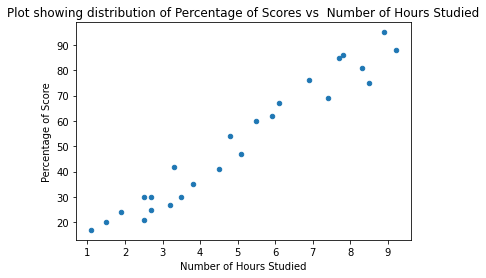

In [7]:
data.plot('Hours','Scores',kind='scatter')
plt.title("Plot showing distribution of Percentage of Scores vs  Number of Hours Studied")
plt.ylabel("Percentage of Score")
plt.xlabel("Number of Hours Studied")
plt.show()

##### The above scatter plot suggests a strong positive linear relationship between percentage of score and number of hours studied

#### Obtaining the correlation coefficient between  percentage of scores and number of hours studied 

In [25]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### The high positive value of the correlation coefficient (0.976191) indicates there exists a strong positive linear relationship between 
##### percentage of scores and number of hours studied

### Preparing the data

In [9]:
x=data.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y=data.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train
y_train
x_test
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### Training the algorithm

In [12]:
reg=LinearRegression()
reg=reg.fit(x_train,y_train)
print("Training Complete")

Training Complete


### Obtaining the Regression equation

In [26]:
a=reg.intercept_ #obtaining the intercept of the regression equation
a

2.018160041434662

In [27]:
b=reg.coef_ #obtaining the regression coefficient of scores on hours
b

array([9.91065648])

In [28]:
reg_eqn=a+(b*x_train)

### Visualising the fit of the regression model for the train data

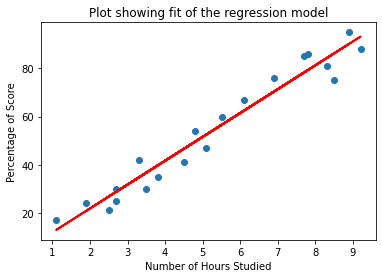

In [16]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg_eqn,color="red",linewidth=2)
plt.title("Plot showing fit of the regression model")
plt.ylabel("Percentage of Score")
plt.xlabel("Number of Hours Studied")
plt.show()

### Making Predictions

In [29]:
scores_pred=reg.predict(x_test)
scores_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Visualising the fit of the regression model for the test data

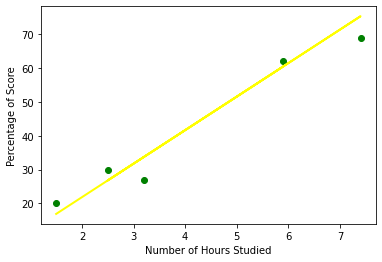

In [30]:
reg_eqn=a+(b*x_test)
plt.scatter(x_test,y_test,color="green")
plt.plot(x_test,reg_eqn,color="yellow",linewidth=2)
plt.ylabel("Percentage of Score")
plt.xlabel("Number of Hours Studied")
plt.show()

### Comparing the observed and predicted percentage of scores

In [31]:
comp=pd.DataFrame({"Observed":y_test,"Predicted":scores_pred})
comp

,Observed,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating the model

##### We use the coefficient of determination, mean squared error and mean absolute error for testing the accuracy of the regression model

In [32]:
from sklearn import metrics
metrics.r2_score(scores_pred,y_test) #Obtaining the coefficient of determination

0.9546785947197246

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(scores_pred,y_test) #Obtaining the mean squared error

21.598769307217456

In [34]:
mean_absolute_error(scores_pred,y_test) #Obtaining the mean absolute error

4.183859899002982

### What will be the predicted score if a student studies for 9.25 hours per day?

In [35]:
x1= np.array([[9.25]])
y1=reg.predict(x1)
y1

array([93.69173249])

In [36]:
print("The percentage score for a student who studies for 9.25 hours per day will be :",y1)

The percentage score for a student who studies for 9.25 hours per day will be : [93.69173249]
